In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import requests

###Getting weather data for melbourne aiport from the open weather api for current weather

lat= -37.663712

lon= 144.844788

api_key=''



#example url to call: https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}



url = "https://api.openweathermap.org/data/2.5/weather?"



params = {'lat': str(lat), 'lon':str(lon), "appid":api_key}



response = requests.get(url, params=params)



json_response = response.json()



json_response

Flight Ontime Reporting With Weather

This is a nice dataset that already combines weather with flight data but it is split by airport, a csv for each, details cancellations airports, time of departure and weather variables like temp, air pressure, visibility, wind speed, wind gust, precipitation, ice report


In [4]:
sfo_df = pd.read_csv('../raw_data/Dataset_B_FORWW_Kaggle/All_Airports.csv', compression='zip')

In [5]:
sfo_df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
0,2021-01-01 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,56.0,55.9,1020.32,1020.1,16093.40,0.0,24.97,0.0,0.0
1,2021-01-02 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,True,2.0,NaN,NaN,...,NaN,54.0,54.0,1025.74,1025.5,16093.40,0.0,24.97,0.0,0.0
2,2021-01-03 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,True,28.0,28.0,0.0,...,0.0,52.0,52.0,1024.38,1015.2,4828.02,4.6,24.97,0.0,0.0
3,2021-01-03 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,True,28.0,28.0,0.0,...,0.0,53.0,53.1,1024.38,1024.1,6437.36,4.6,24.97,0.0,0.0
4,2021-01-04 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,51.0,51.1,1023.03,1015.2,6437.36,4.6,24.97,0.0,0.0


In [6]:
sfo_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15144514 entries, 0 to 15144513
Data columns (total 22 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Origin                  object 
 2   Dest                    object 
 3   Carrier                 object 
 4   Cancelled               bool   
 5   CancellationReason      object 
 6   Delayed                 bool   
 7   DepDelayMinutes         float64
 8   CarrierDelay            float64
 9   WeatherDelay            float64
 10  NASDelay                float64
 11  SecurityDelay           float64
 12  LateAircraftDelay       float64
 13  Temperature             float64
 14  Feels_Like_Temperature  float64
 15  Altimeter_Pressure      float64
 16  Sea_Level_Pressure      float64
 17  Visibility              float64
 18  Wind_Speed              float64
 19  Wind_Gust               float64
 20  Precipitation           float64
 21  Ice_Accretion_3hr       float

In [7]:
sfo_df.describe(include='all')

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
count,15144514,15144514,15144514,15144514,15144514,339711,15144514,1.481562e+07,3.274328e+06,3.274328e+06,...,3.274328e+06,1.514451e+07,1.514451e+07,1.514451e+07,1.514451e+07,1.514451e+07,1.514451e+07,1.514451e+07,1.514451e+07,1.514451e+07
unique,24032,30,352,17,2,4,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-11-04 13:00:00,LAX,ATL,Delta Air Lines Inc.,False,Weather,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1713,1300942,503262,2490622,14804803,195469,9249063,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.608864e+01,2.551989e+01,5.424442e+00,...,2.440234e+01,6.317238e+01,6.218925e+01,1.016327e+03,1.016158e+03,1.452299e+04,9.068776e+00,2.608714e+01,1.739791e-01,1.685416e-04
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.152882e+01,6.765369e+01,3.479500e+01,...,5.611603e+01,1.805368e+01,2.100936e+01,6.502375e+00,6.172797e+00,3.031896e+04,5.421863e+00,3.098764e+00,1.295235e+00,2.063771e-02
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-2.200000e+01,-4.086000e+01,1.164900e+02,9.078000e+02,0.000000e+00,0.000000e+00,9.210000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.100000e+01,5.110000e+01,1.012530e+03,1.012800e+03,1.609340e+04,5.750000e+00,2.474000e+01,0.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,6.500000e+01,6.490000e+01,1.016260e+03,1.016200e+03,1.609340e+04,8.060000e+00,2.624000e+01,0.000000e+00,0.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.100000e+01,2.600000e+01,0.000000e+00,...,2.700000e+01,7.600000e+01,7.600000e+01,1.020320e+03,1.019300e+03,1.609340e+04,1.266000e+01,2.762000e+01,0.000000e+00,0.000000e+00


In [8]:
sfo_df.isnull().sum()

Time                             0
Origin                           0
Dest                             0
Carrier                          0
Cancelled                        0
CancellationReason        14804803
Delayed                          0
DepDelayMinutes             328891
CarrierDelay              11870186
WeatherDelay              11870186
NASDelay                  11870186
SecurityDelay             11870186
LateAircraftDelay         11870186
Temperature                      0
Feels_Like_Temperature           0
Altimeter_Pressure               0
Sea_Level_Pressure               0
Visibility                       0
Wind_Speed                       0
Wind_Gust                        0
Precipitation                    0
Ice_Accretion_3hr                0
dtype: int64

In [9]:
num_cancelled_flights = sfo_df.CancellationReason.count()
print(f"There were {num_cancelled_flights} cancelled flights from San Francisco International Airport between 2021 and 2023")

There were 339711 cancelled flights from San Francisco International Airport between 2021 and 2023


<Axes: xlabel='CancellationReason', ylabel='count'>

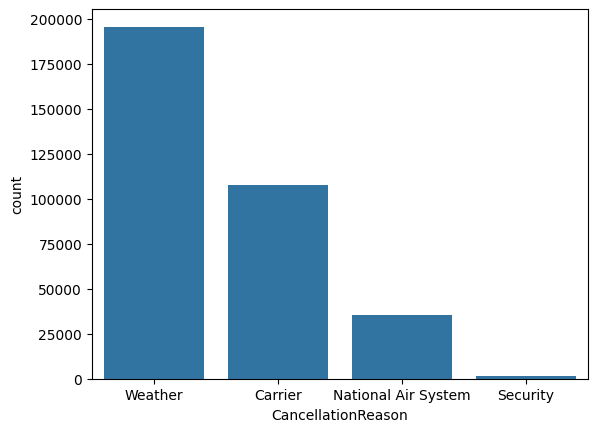

In [10]:
sns.barplot(sfo_df.CancellationReason.value_counts())

In [11]:
#trying to understand the % of flights that were delayed and then also delayed because of bad weather
print(sfo_df.CancellationReason.value_counts(normalize=True))
print(f"\nWeather was the second most prominent reason for cancelling flights around SFO. 35.5% of flights during the period were cancelled due to weather")
print("Carrier related reasons caused the majority of cancelled flights around SFO, accounting for 56 percent of cancellations during the period")

CancellationReason
Weather                0.575398
Carrier                0.316301
National Air System    0.103432
Security               0.004869
Name: proportion, dtype: float64

Weather was the second most prominent reason for cancelling flights around SFO. 35.5% of flights during the period were cancelled due to weather
Carrier related reasons caused the majority of cancelled flights around SFO, accounting for 56 percent of cancellations during the period


In [12]:
#Analysisng  the % of flights delayed
print(sfo_df['Delayed'].value_counts(normalize=True))

Delayed
False    0.61072
True     0.38928
Name: proportion, dtype: float64


In [13]:
#Analyse the distribute of delay lengths in minutes
sfo_delayed = sfo_df[sfo_df.Delayed == True]
sfo_delayed[['WeatherDelay', 'CarrierDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].head()

,WeatherDelay,CarrierDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,NaN,NaN,NaN,NaN,NaN
2,0.0,28.0,2.0,0.0,0.0
3,0.0,28.0,2.0,0.0,0.0
20,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN


In [14]:
sfo_delayed[['WeatherDelay', 'CarrierDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum()

WeatherDelay         17757736.0
CarrierDelay         82415247.0
NASDelay             31246557.0
SecurityDelay          498623.0
LateAircraftDelay    79900712.0
dtype: float64

In [17]:
carrier_delayed = sfo_delayed[sfo_delayed['CarrierDelay'] > 0.0]['CarrierDelay']
LateAircraft_delayed = sfo_delayed[sfo_delayed['LateAircraftDelay'] > 0.0]['LateAircraftDelay']
Security_delayed = sfo_delayed[sfo_delayed['SecurityDelay'] > 0.0]['SecurityDelay']
NAS_delayed = sfo_delayed[sfo_delayed['NASDelay'] > 0.0]['NASDelay']
Weather_delayed = sfo_delayed[sfo_delayed['WeatherDelay'] > 0.0]['WeatherDelay']

print(f"The median Carrier Delay was: {np.median(carrier_delayed)}")
print(f"The median Late Aircraft Delay was: {np.median(LateAircraft_delayed)}")
print(f"The median Security Delay was: {np.median(Security_delayed)}")
print(f"The median NAS Delay was: {np.median(NAS_delayed)}")
print(f"the median weather delay was: {np.median(sfo_wd['WeatherDelay'])}")

The median Carrier Delay was: 21.0
The median Late Aircraft Delay was: 31.0
The median Security Delay was: 19.0
The median NAS Delay was: 14.0
the median weather delay was: 35.0


In [18]:
print(f"The mean Carrier Delay was: {np.mean(carrier_delayed)}")
print(f"The mean Late Aircraft Delay was: {np.mean(LateAircraft_delayed)}")
print(f"The mean Security Delay was: {np.mean(Security_delayed)}")
print(f"The mean NAS Delay was: {np.mean(NAS_delayed)}")
print(f"the mean weather delay was: {np.mean(sfo_wd['WeatherDelay'])}")

The mean Carrier Delay was: 43.74271041048442
The mean Late Aircraft Delay was: 53.56349027050327
The mean Security Delay was: 27.88563279458643
The mean NAS Delay was: 25.03883008901183
the mean weather delay was: 64.5758833944744


In [55]:
sfo_delayed[['WeatherDelay', 'CarrierDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum()

WeatherDelay         17757736.0
CarrierDelay         82415247.0
NASDelay             31246557.0
SecurityDelay          498623.0
LateAircraftDelay    79900712.0
dtype: float64

<Axes: >

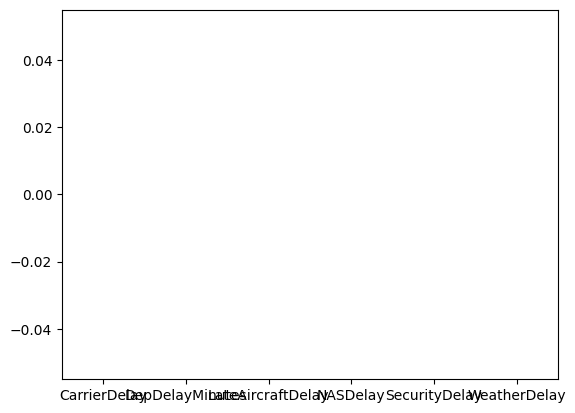

In [58]:
total_delayed_mins = sfo_delayed[['DepDelayMinutes']].sum()
#print(total_delayed_mins)
delay_mins_count = sfo_delayed[['WeatherDelay', 'CarrierDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum()
delay_mins_pct = delay_mins_count /  total_delayed_mins

sns.barplot(delay_mins_pct)


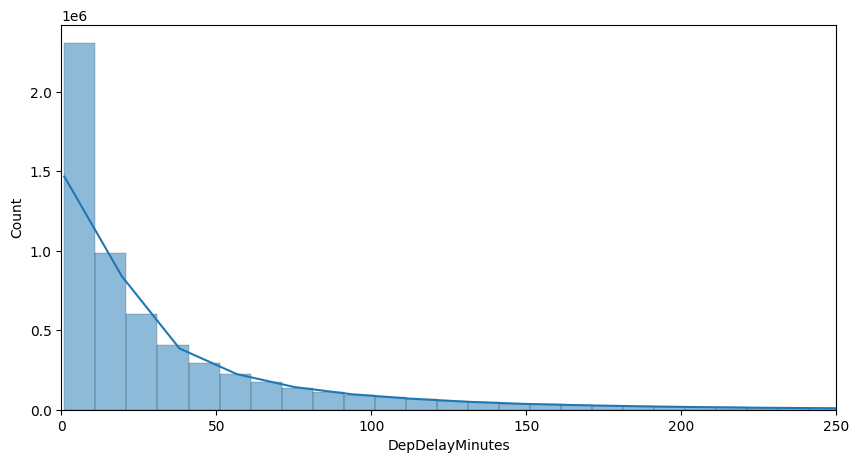

Most flights were only delayed up to 10 minutes


In [27]:
#Distribution of delayed departure length in minutes, each bin has a wdith of 10 minutes of delay.
plt.figure(figsize=(10,5))
sns.histplot(data=sfo_delayed, x='DepDelayMinutes', kde=True, binwidth=10)
plt.xlim(0,250)
#ax.show()
plt.show()
print("Most flights were only delayed up to 10 minutes")

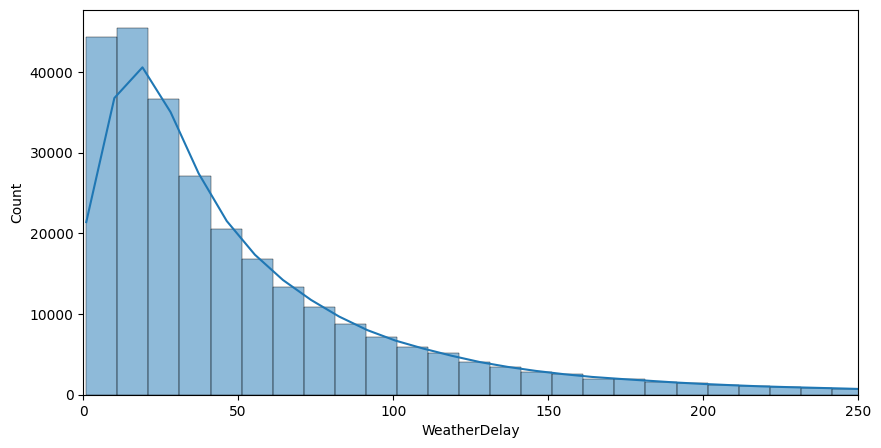

Most flights that were weather delayed were delayed between 10-20 minutes
Circa 25 pct of flights are delayed up to 20 mins
66 pct of flights delayed due to weather were delayed up to 60 minutes with the remaining 3rd being severely delyaed for more than 1 hour
Weather delays are not the most frequent as they only occur circa 3 pct of the time there is a flight delay
However when flights are delayed by weather, they tend to be delayed for longer
For example: the median weather delay was: 35.0 whilst the median overall delay was more than 2x this at: 17.0


In [34]:
#Distribution of weather delayed departure length in minutes, each bin has a wdith of 10 minutes of delay.
plt.figure(figsize=(10,5))
sns.histplot(data=sfo_wd, x='WeatherDelay', kde=True, binwidth=10)
plt.xlim(0,250)
#ax.show()
plt.show()
print("Most flights that were weather delayed were delayed between 10-20 minutes")
print("Circa 25 pct of flights are delayed up to 20 mins")
print("66 pct of flights delayed due to weather were delayed up to 60 minutes with the remaining 3rd being severely delyaed for more than 1 hour")

print("Weather delays are not the most frequent as they only occur circa 3 pct of the time there is a flight delay")
print("However when flights are delayed by weather, they tend to be delayed for longer")
print(f"For example: the median weather delay was: {np.median(sfo_wd['WeatherDelay'])} whilst the median overall delay was more than 2x this at: {median_delay}")

In [35]:
#defining the subset df where flights were delayed due to weather conditions
sfo_wd = sfo_df[sfo_df['WeatherDelay'] > 0.0]

sfo_wd = sfo_wd.reset_index().rename(columns={'index':'OriginalDsIndex', 'Temperature':'Temperature_Fahrenheit', 'Time': 'Expected_Time_Of_Departure'})
sfo_wd.head()


,OriginalDsIndex,Expected_Time_Of_Departure,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,...,LateAircraftDelay,Temperature_Fahrenheit,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
0,395,2021-01-26 00:00:00,LAX,ORD,American Airlines Inc.,False,NaN,True,355.0,0.0,...,0.0,46.0,43.02,1009.14,1009.2,16093.40,5.75,24.97,0.0,0.0
1,3357,2021-01-06 09:00:00,LAX,JFK,Delta Air Lines Inc.,False,NaN,True,24.0,0.0,...,0.0,54.0,54.00,1021.00,1015.2,804.67,5.75,24.97,0.0,0.0
2,3358,2021-01-06 09:00:00,LAX,JFK,Delta Air Lines Inc.,False,NaN,True,24.0,0.0,...,0.0,54.0,54.00,1021.00,1021.0,6437.36,4.60,24.97,0.0,0.0
3,3359,2021-01-06 09:00:00,LAX,JFK,Delta Air Lines Inc.,False,NaN,True,24.0,0.0,...,0.0,55.0,55.00,1021.33,1015.2,804.67,4.60,24.97,0.0,0.0
4,3367,2021-01-06 08:00:00,LAX,HNL,Delta Air Lines Inc.,False,NaN,True,9.0,0.0,...,0.0,51.0,51.10,1020.32,1015.2,2414.01,0.00,24.97,0.0,0.0


In [36]:
sfo_delayed_num_only = sfo_delayed.select_dtypes(include='number')
print(sfo_delayed_num_only.info())


<class 'pandas.core.frame.DataFrame'>
Index: 5895451 entries, 1 to 15144513
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   DepDelayMinutes         float64
 1   CarrierDelay            float64
 2   WeatherDelay            float64
 3   NASDelay                float64
 4   SecurityDelay           float64
 5   LateAircraftDelay       float64
 6   Temperature             float64
 7   Feels_Like_Temperature  float64
 8   Altimeter_Pressure      float64
 9   Sea_Level_Pressure      float64
 10  Visibility              float64
 11  Wind_Speed              float64
 12  Wind_Gust               float64
 13  Precipitation           float64
 14  Ice_Accretion_3hr       float64
dtypes: float64(15)
memory usage: 719.7 MB
None


In [37]:
sfo_delayed_num_only.head()

,DepDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
1,2.0,NaN,NaN,NaN,NaN,NaN,54.0,54.0,1025.74,1025.5,16093.40,0.00,24.97,0.0,0.0
2,28.0,28.0,0.0,2.0,0.0,0.0,52.0,52.0,1024.38,1015.2,4828.02,4.60,24.97,0.0,0.0
3,28.0,28.0,0.0,2.0,0.0,0.0,53.0,53.1,1024.38,1024.1,6437.36,4.60,24.97,0.0,0.0
20,3.0,NaN,NaN,NaN,NaN,NaN,62.0,62.1,1022.69,1022.6,16093.40,3.45,24.97,0.0,0.0
21,2.0,NaN,NaN,NaN,NaN,NaN,58.0,57.9,1022.69,1022.5,16093.40,0.00,24.97,0.0,0.0


In [38]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

In [39]:

zero_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0.0)
sfo_delayed_imputed = zero_imputer.fit_transform(sfo_delayed_num_only)

sfo_delayed_num = pd.DataFrame(sfo_delayed_imputed , columns=sfo_delayed_num_only.columns)
sfo_delayed_num.head()

,DepDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
0,2.0,0.0,0.0,0.0,0.0,0.0,54.0,54.0,1025.74,1025.5,16093.40,0.00,24.97,0.0,0.0
1,28.0,28.0,0.0,2.0,0.0,0.0,52.0,52.0,1024.38,1015.2,4828.02,4.60,24.97,0.0,0.0
2,28.0,28.0,0.0,2.0,0.0,0.0,53.0,53.1,1024.38,1024.1,6437.36,4.60,24.97,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,62.0,62.1,1022.69,1022.6,16093.40,3.45,24.97,0.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,58.0,57.9,1022.69,1022.5,16093.40,0.00,24.97,0.0,0.0


In [40]:
rscaler = RobustScaler()

scaled_data = rscaler.fit_transform(sfo_delayed_num)
scaled_weather_data = rscaler.fit_transform(sfo_delayed_num[sfo_delayed_num.WeatherDelay > 0.0])

sfo_delayed_num_scaled = pd.DataFrame(scaled_data, columns=sfo_delayed_num.columns)
sfo_delayed_num_scaled_weather = pd.DataFrame(scaled_weather_data, columns=sfo_delayed_num.columns)

sfo_delayed_num_scaled_weather

,DepDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
0,3.746835,0.0,5.500000,0.0000,0.0,0.000000,-1.086957,-1.215584,-0.681879,-1.891892,0.142857,-0.57196,-0.443730,-0.023622,0.0
1,-0.443038,0.0,-0.196429,1.3125,0.0,0.000000,-0.739130,-0.740260,0.910067,-0.270270,-1.214286,-0.57196,-0.443730,-0.023622,0.0
2,-0.443038,0.0,-0.196429,1.3125,0.0,0.000000,-0.739130,-0.740260,0.910067,1.297297,-0.714286,-0.71464,-0.443730,-0.023622,0.0
3,-0.443038,0.0,-0.196429,1.3125,0.0,0.000000,-0.695652,-0.696970,0.954362,-0.270270,-1.214286,-0.71464,-0.443730,-0.023622,0.0
4,-0.632911,0.0,-0.464286,1.6250,0.0,0.000000,-0.869565,-0.865801,0.818792,-0.270270,-1.071429,-1.28536,-0.443730,-0.023622,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274971,-0.316456,0.0,-0.071429,0.3750,0.0,0.176471,-0.217391,-0.220779,0.318121,0.081081,-1.000000,0.57072,12.617363,4.173228,0.0
274972,-0.316456,0.0,-0.071429,0.3750,0.0,0.176471,-0.260870,-0.264069,0.318121,-0.108108,-0.571429,0.42804,4.109325,1.976378,0.0
274973,-0.316456,0.0,-0.071429,0.3750,0.0,0.176471,-0.260870,-0.264069,0.228188,-0.108108,-1.000000,0.42804,0.591640,3.574803,0.0
274974,-0.316456,0.0,-0.071429,0.3750,0.0,0.176471,-0.217391,-0.220779,0.273826,-0.108108,-0.714286,-0.14268,0.591640,5.574803,0.0


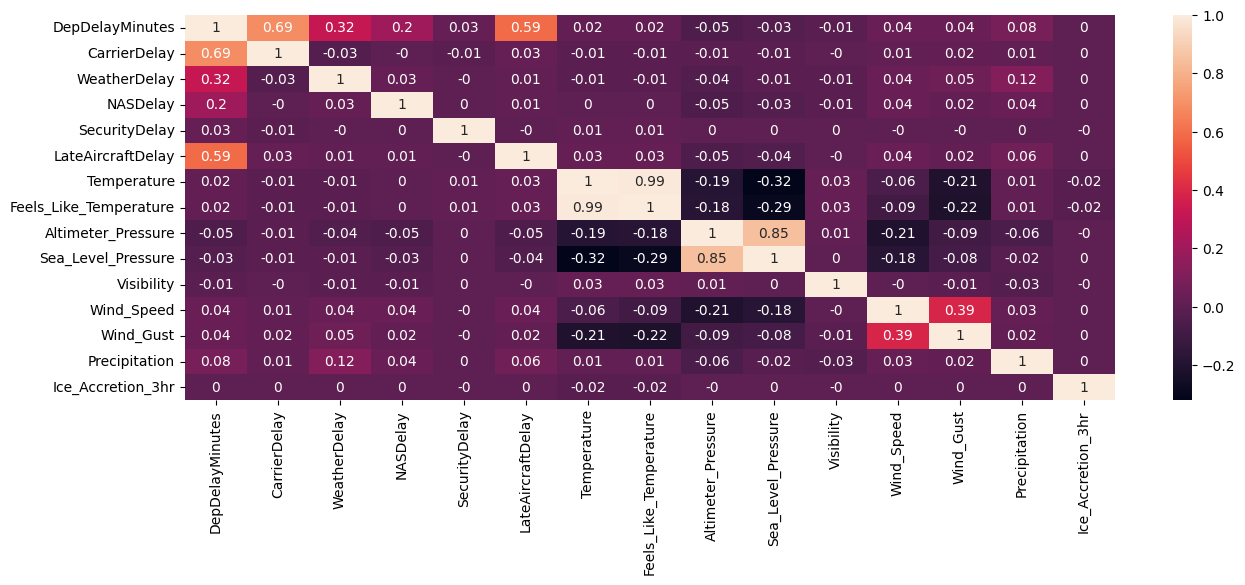

In [41]:
sfo_delayed_num_scaled_corr_df = round(sfo_delayed_num_scaled.corr(),2)
plt.figure(figsize=(15,5))
sns.heatmap(sfo_delayed_num_scaled_corr_df, annot=True)
plt.show()

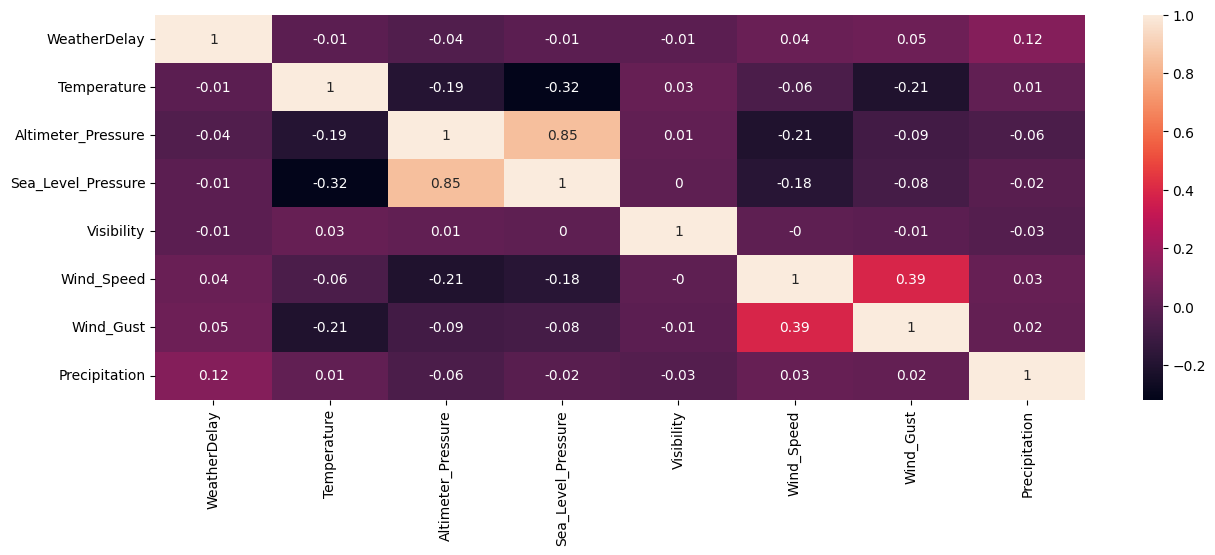

In [42]:
sfo_delayed_num_scaled_corr_df = round(sfo_delayed_num_scaled[['WeatherDelay', 'Temperature', 'Altimeter_Pressure', 'Sea_Level_Pressure', 'Visibility', 'Wind_Speed', 'Wind_Gust', 'Precipitation']].corr(),2)
plt.figure(figsize=(15,5))
sns.heatmap(sfo_delayed_num_scaled_corr_df, annot=True)
plt.show()

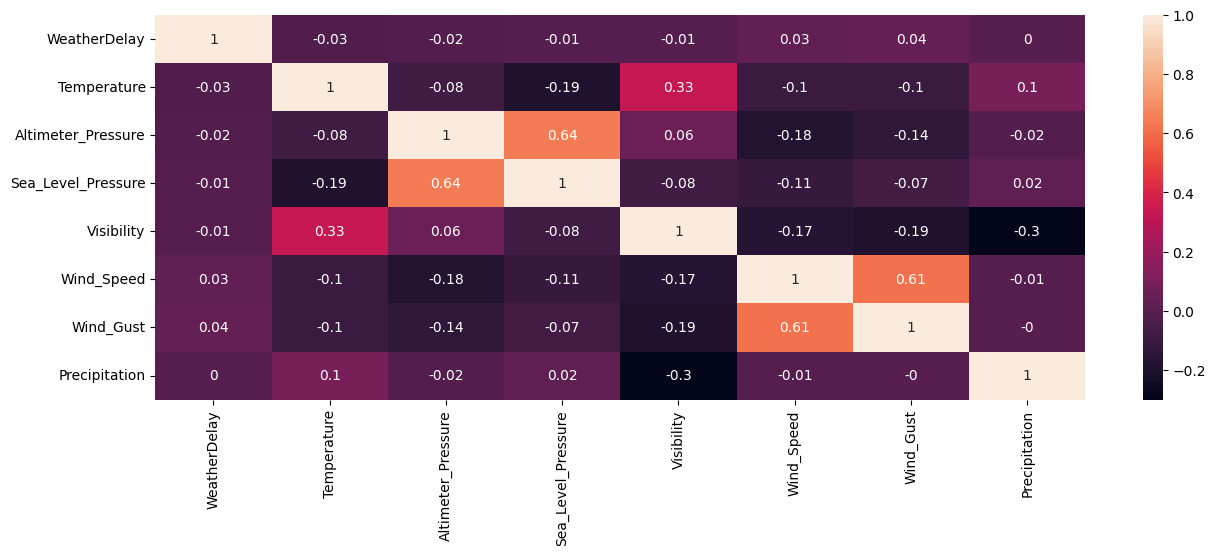

In [43]:


sfo_delayed_num_scaled_corr_df = round(sfo_delayed_num_scaled_weather[['WeatherDelay', 'Temperature', 'Altimeter_Pressure', 'Sea_Level_Pressure', 'Visibility', 'Wind_Speed', 'Wind_Gust', 'Precipitation']].corr(),2)
plt.figure(figsize=(15,5))
sns.heatmap(sfo_delayed_num_scaled_corr_df, annot=True)
plt.show()

In [44]:
round(sfo_delayed_num_only.describe())

,DepDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
count,5895451.0,2906911.0,2906911.0,2906911.0,2906911.0,2906911.0,5895451.0,5895451.0,5895451.0,5895451.0,5895451.0,5895451.0,5895451.0,5895451.0,5895451.0
mean,40.0,28.0,6.0,11.0,0.0,27.0,65.0,64.0,1016.0,1016.0,14355.0,9.0,26.0,0.0,0.0
std,75.0,71.0,37.0,29.0,4.0,59.0,19.0,22.0,6.0,6.0,34324.0,6.0,3.0,2.0,0.0
min,1.0,0.0,0.0,0.0,0.0,0.0,-22.0,-41.0,116.0,908.0,0.0,0.0,9.0,0.0,0.0
25%,6.0,0.0,0.0,0.0,0.0,0.0,53.0,53.0,1012.0,1012.0,16093.0,6.0,25.0,0.0,0.0
50%,17.0,9.0,0.0,0.0,0.0,2.0,67.0,67.0,1016.0,1016.0,16093.0,9.0,26.0,0.0,0.0
75%,45.0,29.0,0.0,11.0,0.0,32.0,78.0,78.0,1020.0,1018.0,16093.0,13.0,28.0,0.0,0.0
max,3695.0,3221.0,1805.0,1409.0,1183.0,3581.0,119.0,119.0,1042.0,1068.0,33804187.0,282.0,97.0,82.0,12.0


In [45]:
median_delay = np.median(sfo_delayed_num_only['DepDelayMinutes'])
print(f"The median delay was {median_delay} minutes")

The median delay was 17.0 minutes


In [46]:

sfo_delayed_num_only_corr = round(sfo_delayed_num_only.corr(),2)
sfo_delayed_num_only_corr


,DepDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
DepDelayMinutes,1.00,0.66,0.30,0.11,0.02,0.54,0.02,0.02,-0.05,-0.03,-0.01,0.04,0.04,0.08,0.00
CarrierDelay,0.66,1.00,-0.06,-0.08,-0.02,-0.06,-0.02,-0.02,0.01,0.01,0.00,-0.02,0.01,-0.02,0.00
WeatherDelay,0.30,-0.06,1.00,-0.00,-0.01,-0.03,-0.01,-0.01,-0.04,-0.00,-0.03,0.05,0.06,0.12,0.00
NASDelay,0.11,-0.08,-0.00,1.00,-0.01,-0.08,-0.00,0.00,-0.05,-0.02,-0.01,0.04,0.02,0.02,0.00
SecurityDelay,0.02,-0.02,-0.01,-0.01,1.00,-0.01,0.01,0.01,0.01,0.01,0.00,-0.01,-0.01,-0.00,-0.00
LateAircraftDelay,0.54,-0.06,-0.03,-0.08,-0.01,1.00,0.04,0.04,-0.03,-0.03,-0.00,0.02,0.01,0.04,0.00
Temperature,0.02,-0.02,-0.01,-0.00,0.01,0.04,1.00,0.99,-0.19,-0.32,0.03,-0.06,-0.21,0.01,-0.02
Feels_Like_Temperature,0.02,-0.02,-0.01,0.00,0.01,0.04,0.99,1.00,-0.18,-0.29,0.03,-0.09,-0.22,0.01,-0.02
Altimeter_Pressure,-0.05,0.01,-0.04,-0.05,0.01,-0.03,-0.19,-0.18,1.00,0.85,0.01,-0.21,-0.09,-0.06,-0.00
Sea_Level_Pressure,-0.03,0.01,-0.00,-0.02,0.01,-0.03,-0.32,-0.29,0.85,1.00,0.00,-0.18,-0.08,-0.02,0.00


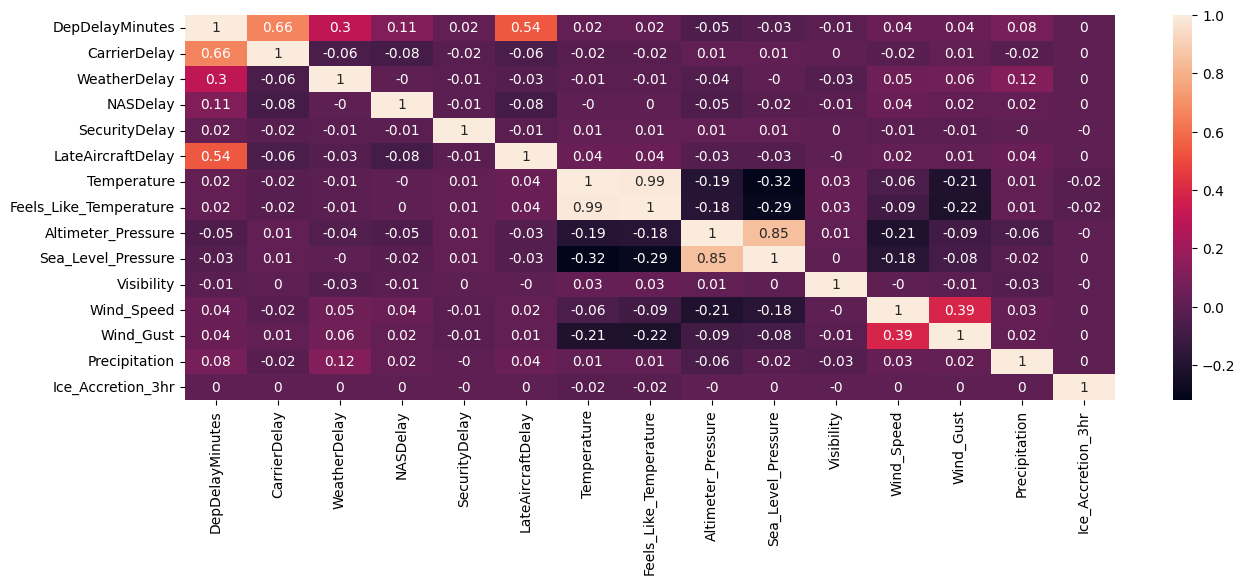

In [47]:
plt.figure(figsize=(15,5))
sns.heatmap(sfo_delayed_num_only_corr, annot=True)
plt.show()

In [48]:
num_of_weather_delays = sfo_wd['WeatherDelay'].count()

print(f"{num_of_weather_delays} flights were delayed due to weather")

275047 flights were delayed due to weather


Airline Delay and Cancellation Data, 2009 - 2018

This is a very comprehensive list of delay and cancellation data for 9 years but it doesn't contain any weather data

Data is split by year with a csv for each

Airline Delays - good for 2019 and 2020 delay and cancellation reasons, no detailed weather variables